In [1]:
--- Loading data with our most robust method (this may take a few minutes)... ---
Dataset loaded successfully!
Data cleaned, types fixed, and bad rows dropped!

--- Let's check the 'type' column with our definitive fix: ---
Unique transaction types found: ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN' 'C06208368T' '8477'
 'ER' '2654985904257340.2' '226707983' '6P59' '6860173.1169C17.500Y'
 '657.M34' '50054' '6268.631119' '362.2E1' '875641.0' '30137906NT'
 '2460N7INT' '2810002NT' 'C94226NTC20.0306653' '2715950' '41.722.'
 '595020224C1698682NT1' '54655873T' '721419EN76C408363094' '1351429'
 '124725983' '24272N78' '37' '8' '32839590' '359493592013' '1972528528']

--- Here is the correctly loaded and cleaned data: ---
step	type	amount	nameOrig	oldbalanceOrg	newbalanceOrig	nameDest	oldbalanceDest	newbalanceDest	isFraud
0	1.0	PAYMENT	9839.64	C1231006815	170136.0	160296.36	M1979787155	0.0	0.0	0.0
1	1.0	PAYMENT	1864.28	C1666544295	21249.0	19384.72	M2044282225	0.0	0.0	0.0
2	1.0	TRANSFER	181.00	C1305486145	181.0	0.00	C553264065	0.0	0.0	1.0
3	1.0	CASH_OUT	181.00	C840083671	181.0	0.00	C38997010	21182.0	0.0	1.0
4	1.0	PAYMENT	11668.14	C2048537720	41554.0	29885.86	M1230701703	0.0	0.0	0.0


SyntaxError: unterminated string literal (detected at line 5) (3043341219.py, line 5)

In [2]:
import pandas as pd

# --- 1. ROBUST DATA LOADING (We accept it will be messy) ---
column_names = [
    'step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
    'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'
]
file_path = 'data/transactions.csv'

print("--- Loading data with the robust 'python' engine... ---")
df = pd.read_csv(
    file_path,
    header=0,
    names=column_names,
    engine='python',
    on_bad_lines='skip'
)
print("Messy dataset loaded successfully.")

# --- 2. STANDARD CLEANING ---
if 'isFlaggedFraud' in df.columns:
    df = df.drop(columns=['isFlaggedFraud'])
numeric_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(inplace=True)
print("Initial cleaning and type conversion complete.")

# --- 3. THE CRUCIAL FILTERING STEP ---
# Define the list of valid, known transaction types
valid_types = ['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN']

print(f"\nRows before filtering: {len(df)}")

# Keep only the rows where the 'type' is in our list of valid types
df = df[df['type'].isin(valid_types)]

print(f"Rows after filtering: {len(df)}")
print("Corrupted rows have been removed!")


# --- 4. FINAL VERIFICATION ---
print("\n--- Let's check the 'type' column after filtering: ---")
print("Unique transaction types found:", df['type'].unique())

print("\n--- Here is your final, clean data: ---")
display(df.head())

--- Loading data with the robust 'python' engine... ---
Messy dataset loaded successfully.
Initial cleaning and type conversion complete.

Rows before filtering: 2136048
Rows after filtering: 2136019
Corrupted rows have been removed!

--- Let's check the 'type' column after filtering: ---
Unique transaction types found: ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']

--- Here is your final, clean data: ---


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1.0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,1.0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,1.0,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0
3,1.0,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0
4,1.0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0


In [3]:
# The 'y' is our target variable - the thing we want to predict.
y = df['isFraud']

# The 'X' is our set of features - all the columns we will use to make the prediction.
# We drop the original target column 'isFraud' and the non-numeric ID columns.
X = df.drop(columns=['isFraud', 'nameOrig', 'nameDest'])

print("--- Target (y) ---")
print(y.head())
print("\n--- Features (X) ---")
display(X.head())

--- Target (y) ---
0    0.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: isFraud, dtype: float64

--- Features (X) ---


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1.0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0
1,1.0,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0
2,1.0,TRANSFER,181.00,181.0,0.00,0.0,0.0
3,1.0,CASH_OUT,181.00,181.0,0.00,21182.0,0.0
4,1.0,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0


In [4]:
from sklearn.model_selection import train_test_split

# --- 1. Define Features (X) and Target (y) ---
# The 'y' is our target variable (what we want to predict)
y = df['isFraud']
# 'X' is our set of features (what we use to make the prediction)
X = df.drop(columns=['isFraud', 'nameOrig', 'nameDest'])


# --- 2. THE CRUCIAL FIX: Convert 'type' column to numbers ---
# This step, called one-hot encoding, turns the single 'type' column
# into multiple simple Yes/No columns (e.g., type_PAYMENT, type_TRANSFER).
X = pd.get_dummies(X, columns=['type'], prefix='type')
print("--- Text in 'type' column has been converted to numbers. ---")


# --- 3. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\n--- Data Splitting Complete ---")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

print("\n--- Here is the final, model-ready training data (X_train): ---")
display(X_train.head())

--- Text in 'type' column has been converted to numbers. ---

--- Data Splitting Complete ---
Shape of X_train: (1708815, 11)
Shape of X_test: (427204, 11)

--- Here is the final, model-ready training data (X_train): ---


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
1582700,155.0,353369.45,0.00,0.00,1827773.77,2181143.22,False,True,False,False,False
675664,36.0,159962.30,39604.00,199566.30,6712422.90,6779002.77,True,False,False,False,False
517357,20.0,1245.80,71511.37,70265.57,0.00,0.00,False,False,False,True,False
235079,14.0,7999.52,375.00,0.00,0.00,0.00,False,False,False,True,False
68314,9.0,11542.76,23713.00,12170.24,0.00,0.00,False,False,False,True,False


In [6]:
from sklearn.ensemble import IsolationForest
import joblib # Used for saving our trained models

print("--- Training Isolation Forest Model ---")
# This may take a moment as it's a complex model.

# Initialize the model using the parameters from your project plan
# n_jobs=-1 uses all available CPU cores to speed up training
iso_forest = IsolationForest(n_estimators=300, contamination='auto', random_state=42, n_jobs=-1)

# Train (fit) the model on our training data
iso_forest.fit(X_train)

print("Isolation Forest training complete!")

# Save the trained model to a file so we can use it later
joblib.dump(iso_forest, 'IsolationForest.joblib')
print("Model saved as IsolationForest.joblib")

--- Training Isolation Forest Model ---
Isolation Forest training complete!
Model saved as IsolationForest.joblib


In [7]:
import xgboost as xgb
import joblib

print("\n--- Training XGBoost Model ---")
# This will likely be faster than the Isolation Forest.

# Calculate the scale_pos_weight value to handle the imbalanced dataset
# It's the ratio of negative cases (non-fraud) to positive cases (fraud)
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

# Initialize the XGBoost model with parameters from your plan
xgboost_model = xgb.XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='auc',
    random_state=42,
    scale_pos_weight=scale_pos_weight, # This is the crucial parameter
    n_jobs=-1
)

# Train the model on our training data
xgboost_model.fit(X_train, y_train)

print("XGBoost training complete!")

# Save the trained model to a file
joblib.dump(xgboost_model, 'XGBoost.joblib')
print("Model saved as XGBoost.joblib")


--- Training XGBoost Model ---
XGBoost training complete!
Model saved as XGBoost.joblib


--- Loading the trained XGBoost model ---
Making predictions on the unseen test data...

--- XGBoost Model Performance Report ---
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    426788
       Fraud       0.49      0.95      0.65       416

    accuracy                           1.00    427204
   macro avg       0.75      0.98      0.82    427204
weighted avg       1.00      1.00      1.00    427204


--- Confusion Matrix ---


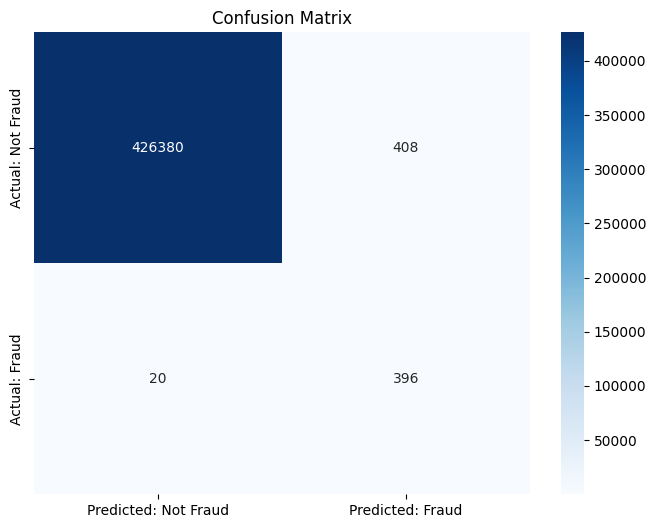

In [8]:
import joblib
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the saved XGBoost model we just trained
print("--- Loading the trained XGBoost model ---")
xgboost_model = joblib.load('XGBoost.joblib')

# --- Step 1: Make Predictions on the Test Set ---
print("Making predictions on the unseen test data...")
y_pred = xgboost_model.predict(X_test)

# --- Step 2: Evaluate Model Performance ---
print("\n--- XGBoost Model Performance Report ---")
# The report shows the main classification metrics
print(classification_report(y_test, y_pred, target_names=['Not Fraud', 'Fraud']))

# --- Step 3: Visualize the Confusion Matrix ---
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)

# We'll use a heatmap to make the confusion matrix easier to read
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted: Not Fraud', 'Predicted: Fraud'], 
            yticklabels=['Actual: Not Fraud', 'Actual: Fraud'])
plt.title('Confusion Matrix')
plt.show()

--- Loading the trained Isolation Forest model ---
Making predictions on the unseen test data...

--- Isolation Forest Model Performance Report ---
              precision    recall  f1-score   support

   Not Fraud       1.00      0.84      0.91    426788
       Fraud       0.00      0.56      0.01       416

    accuracy                           0.84    427204
   macro avg       0.50      0.70      0.46    427204
weighted avg       1.00      0.84      0.91    427204


--- Confusion Matrix ---


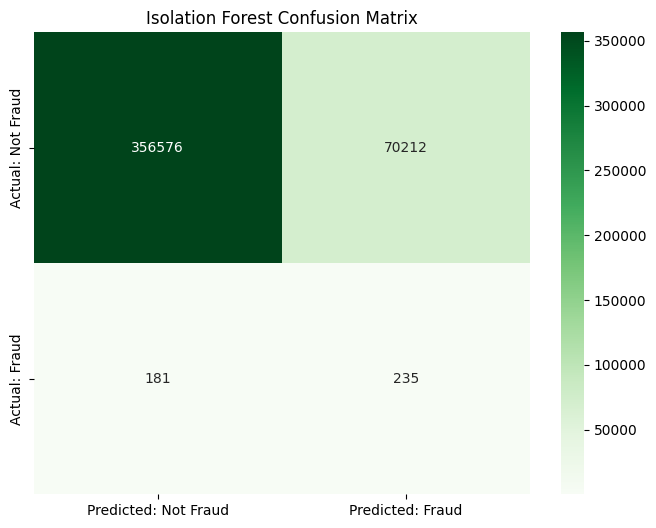

In [9]:
import joblib
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the saved Isolation Forest model
print("--- Loading the trained Isolation Forest model ---")
iso_forest = joblib.load('IsolationForest.joblib')

# --- Step 1: Make Predictions on the Test Set ---
# The model predicts 1 for normal (inlier) and -1 for anomaly (outlier)
print("Making predictions on the unseen test data...")
iso_pred_raw = iso_forest.predict(X_test)

# --- Step 2: Map Predictions to Fraud Labels ---
# We need to convert the model's output (-1, 1) to our labels (1, 0)
# Anomaly (-1) is a prediction for Fraud (1)
# Normal (1) is a prediction for Not Fraud (0)
iso_pred = np.where(iso_pred_raw == -1, 1, 0)

# --- Step 3: Evaluate Model Performance ---
print("\n--- Isolation Forest Model Performance Report ---")
print(classification_report(y_test, iso_pred, target_names=['Not Fraud', 'Fraud']))

# --- Step 4: Visualize the Confusion Matrix ---
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, iso_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicted: Not Fraud', 'Predicted: Fraud'],
            yticklabels=['Actual: Not Fraud', 'Actual: Fraud'])
plt.title('Isolation Forest Confusion Matrix')
plt.show()

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# --- Step 1: Robustly Load the Data ---
column_names = [
    'step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
    'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'
]
# THE FIX: Changed 'data' to 'Data' to match your folder name
file_path = 'Data/transactions.csv' 
df = pd.read_csv(
    file_path,
    header=0,
    names=column_names,
    engine='python',
    on_bad_lines='skip'
)
print("Dataset loaded.")

# --- Step 2: Clean and Prepare the Data ---
if 'isFlaggedFraud' in df.columns:
    df = df.drop(columns=['isFlaggedFraud'])
numeric_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(inplace=True)
valid_types = ['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN']
df = df[df['type'].isin(valid_types)]
print("Data cleaned and filtered.")

# --- Step 3: Define Features (X) and Target (y) ---
y = df['isFraud']
X = df.drop(columns=['isFraud', 'nameOrig', 'nameDest'])

# --- Step 4: One-Hot Encode the 'type' Column ---
X = pd.get_dummies(X, columns=['type'], prefix='type')
print("Features prepared.")

# --- Step 5: Split the Data (This creates X_train) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Data splitting complete. 'X_train' has been created!")

FileNotFoundError: [Errno 2] No such file or directory: 'Data/transactions.csv'

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

# --- Step 1: Robustly Load the Data ---
column_names = [
    'step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
    'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'
]
# THE FIX: Changed 'data' to 'Data' to match your folder name
file_path = '../Data/transactions.csv' 
df = pd.read_csv(
    file_path,
    header=0,
    names=column_names,
    engine='python',
    on_bad_lines='skip'
)
print("Dataset loaded.")

# --- Step 2: Clean and Prepare the Data ---
if 'isFlaggedFraud' in df.columns:
    df = df.drop(columns=['isFlaggedFraud'])
numeric_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(inplace=True)
valid_types = ['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN']
df = df[df['type'].isin(valid_types)]
print("Data cleaned and filtered.")

# --- Step 3: Define Features (X) and Target (y) ---
y = df['isFraud']
X = df.drop(columns=['isFraud', 'nameOrig', 'nameDest'])

# --- Step 4: One-Hot Encode the 'type' Column ---
X = pd.get_dummies(X, columns=['type'], prefix='type')
print("Features prepared.")

# --- Step 5: Split the Data (This creates X_train) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Data splitting complete. 'X_train' has been created!")

Dataset loaded.
Data cleaned and filtered.
Features prepared.
Data splitting complete. 'X_train' has been created!


In [6]:
# Run this in a new cell after the script above is complete

X_train_sample = X_train.sample(n=100, random_state=42)
X_train_sample.to_csv('X_train_sample.csv', index=False)

print("X_train_sample.csv has been created successfully!")

X_train_sample.csv has been created successfully!
